In [1]:
import math
from sklearn.datasets import load_svmlight_file
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):  # sigmoid函数
    return 1.0 / (1 + math.exp(-x))

In [3]:
# 读取实验数据,X增加一列1  n_features=123
def get_data(file):
    data = load_svmlight_file(file,n_features=123)
    b = np.ones(data[0].toarray().shape[0])
    X = np.column_stack((data[0].toarray(), b))
    return X, data[1]

In [4]:
def RMSProp(train_x, train_y,  valid_x,valid_y,batch_num,numIter):
    numSamples_train, numFeatures = np.shape(train_x)  # 获取训练样本的规模
    numSamples_valid, numFeatures2 = np.shape(valid_x)  # 获取训练样本的规模
    weight = np.array([0.0] * numFeatures)
    alpha = 0.01  # 迭代步长

    Lvalid = []
    gamma=0.99
    s=0
    eps=1e-8

    for j in range(numIter):
        delta = 0
        loss = 0.0
        for n in range(numSamples_valid):
            #计算损失
            var = valid_x[n, :] * weight
            temp = np.sum(var)
            h = sigmoid(temp)
            var0 = np.log(h)  # log=ln
            var1 = valid_y[n] * var0
            var2 = (1 - valid_y[n])
            var3 = var2 * np.log(1 - h)
            var4 = np.array(var1) + np.array(var3);
            temp1 = (-1) * var4;
            loss = loss + temp1
        Lvalid.append(loss / numSamples_valid)

        for k in range(batch_num):         #批处理数batch_num
            # 随机选一个样本计算梯度
            i = np.random.randint(0, numSamples_train)
            var = train_x[i, :]
            temp = np.sum(var * weight)
            h = sigmoid(temp)
            error = h - train_y[i]
            delta = delta + train_x[i, :].transpose() * error  #计算批处理数batch_num的总梯度
        #RMSProp计算
        g=delta/batch_num
        g2=g*g
        var1=gamma*s
        var2=(1.0-gamma)
        var3=var2*g2
        s=var1+var3

        var4=s+eps
        var5=(np.sqrt(var4))
        var6=alpha/(var5)
        gpi=var6*g
        weight=weight-gpi


    return Lvalid

In [5]:
def Adam(train_x, train_y,  valid_x,valid_y,batch_num,numIter):
    numSamples_train, numFeatures = np.shape(train_x)  # 获取训练样本的规模
    numSamples_valid, numFeatures2 = np.shape(valid_x)  # 获取训练样本的规模
    weight = np.array([0.0] * numFeatures)
    alpha = 0.1  # 迭代步长

    Lvalid = []
    bata1 = 0.9
    bata2=0.999
    s=0
    v=0
    eps=1e-5

    for j in range(numIter):
        delta = 0
        loss=0.0
        for n in range(numSamples_valid):
            # 计算损失
            var = valid_x[n, :] * weight
            temp = np.sum(var)
            h = sigmoid(temp)
            var0 = np.log(h)  # log=ln
            var1 = valid_y[n] * var0
            var2 = (1 - valid_y[n])
            var3 = var2 * np.log(1 - h)
            var4 = np.array(var1) + np.array(var3);
            temp1 = (-1) * var4;
            loss = loss + temp1
        Lvalid.append(loss / numSamples_valid)

        for k in range(batch_num):         #批处理数batch_num
            i = np.random.randint(0, numSamples_train) #随机选一个样本计算梯度
            var = train_x[i, :]
            temp = np.sum(var * weight)
            h = sigmoid(temp)
            error = h - train_y[i]
            delta = delta + train_x[i, :].transpose() * error  #计算批处理数batch_num的总梯度

        g=delta/batch_num
        t = j + 1
        g2=g*g
        v=bata1*v+(1-bata1)*g
        s=bata2*s+(1-bata2)*g2

        v_head=v/(1.0-bata1**t)
        s_head=s/(1.0-bata2**t)

        gpi=(alpha*v_head)/np.sqrt(s_head+eps)
        weight=weight-gpi
    return Lvalid

In [6]:
def NAG(train_x, train_y,  valid_x,valid_y,batch_num,numIter):
    numSamples_train, numFeatures = np.shape(train_x)  # 获取训练样本的规模
    numSamples_valid, numFeatures2 = np.shape(valid_x)  # 获取训练样本的规模
    weight = np.array([0.0] * numFeatures)
    alpha = 0.01  # 迭代步长0.01>1

    Lvalid = []
    rho=0.999
    v=0

    for j in range(numIter):
        delta = 0
        loss=0.0
        for n in range(numSamples_valid):
            # 计算损失
            var = valid_x[n, :] * weight
            temp = np.sum(var)
            h = sigmoid(temp)
            var0 = np.log(h)  # log=ln
            var1 = valid_y[n] * var0
            var2 = (1 - valid_y[n])
            var3 = var2 * np.log(1 - h)
            var4 = np.array(var1) + np.array(var3);
            temp1 = (-1) * var4;
            loss = loss + temp1
        Lvalid.append(loss / numSamples_valid)

        for k in range(batch_num):         #批处理数batch_num
            i = np.random.randint(0, numSamples_train) #随机选一个样本计算梯度
            var = train_x[i, :]
            temp = np.sum(var * (weight-rho * v))   #  temp = np.sum(var * weight)
            h = sigmoid(temp)
            error = h - train_y[i]
            delta = delta + train_x[i, :].transpose() * error  #计算批处理数batch_num的总梯度
        # NAG计算
        g=(delta/batch_num)
        v=rho*v+alpha*g
        weight=weight-v

    return Lvalid

In [7]:
def Adadelta(train_x, train_y,  valid_x,valid_y,batch_num,numIter):
    numSamples_train, numFeatures = np.shape(train_x)  # 获取训练样本的规模
    numSamples_valid, numFeatures2 = np.shape(valid_x)  # 获取训练样本的规模
    weight = np.array([0.0] * numFeatures)
    alpha = 0.001  # 迭代步长

    Lvalid = []
    rho=0.9999
    s=0
    eps=1e-5
    deltaX=0

    for j in range(numIter):
        delta = 0
        loss = 0.0
        for n in range(numSamples_valid):
            # 计算损失
            var = valid_x[n, :] * weight
            temp = np.sum(var)
            h = sigmoid(temp)
            var0 = np.log(h)  # log=ln
            var1 = valid_y[n] * var0
            var2 = (1 - valid_y[n])
            var3 = var2 * np.log(1 - h)
            var4 = np.array(var1) + np.array(var3);
            temp1 = (-1) * var4;
            loss = loss + temp1
        Lvalid.append(loss / numSamples_valid)

        for k in range(batch_num):         #批处理数batch_num
            i = np.random.randint(0, numSamples_train) #随机选一个样本计算梯度
            var = train_x[i, :]
            temp = np.sum(var * weight)
            h = sigmoid(temp)
            error = h - train_y[i]
            delta = delta + train_x[i, :].transpose() * error  #计算批处理数batch_num的总梯度
        # Adadelta计算
        g=delta/batch_num
        g2=g*g
        var1=rho*s
        var2=(1.0-rho)
        var3=var2*g2
        s=var1+var3

        var4=s+eps
        var5=(np.sqrt(var4))

        var6=deltaX+eps
        var7=np.sqrt(var6)

        var8=var7/(var5)
        gpi=var8*g

        var9=rho*deltaX
        var10=var2*gpi
        var11=var10*gpi

        deltaX=var9+var11

        weight=weight-gpi

    return Lvalid

In [8]:
def run():
    #读取实验训练集
    train_x, train_y = get_data("C:\workspace\DeepLearningTest\data/a9a.txt")
    temp = []
    for item in train_y:
        if item > 0:
            temp.append(1.0)
        else:
            temp.append(0.0)

    train_y = np.array(temp)

    #读取实验验证集
    valid_x, valid_y = get_data("C:\workspace\DeepLearningTest\data/a9a.t.txt")
    temp = []
    for item in valid_y:
        if item > 0:
            temp.append(1.0)
        else:
            temp.append(0.0)

    valid_y = np.array(temp)

    batch_num = 256  # 批处理数
    iteration_num = 100  # 最大迭代次数

    L_RMSProp = RMSProp(train_x, train_y, valid_x, valid_y, batch_num, iteration_num)
    L_Adadelta = Adadelta(train_x, train_y, valid_x, valid_y, batch_num, iteration_num)
    L_Adam=Adam(train_x, train_y, valid_x, valid_y, batch_num, iteration_num)
    L_NAG = NAG(train_x, train_y, valid_x, valid_y, batch_num, iteration_num)

    plt.plot(L_RMSProp, label='L_RMSProp')
    plt.plot(L_Adadelta, label='L_Adadelta')
    plt.plot(L_Adam, label='L_Adam')
    plt.plot(L_NAG, label='L_NAG')
    plt.legend()
    plt.show()

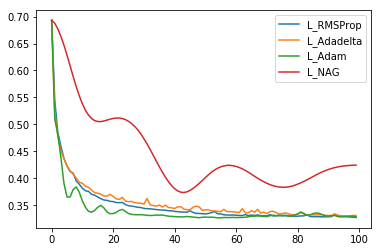

In [10]:
run()